In [ ]:
!pip install git+https://github.com/Mayukhdeb/torch-dreams

In [ ]:
!wget https://raw.githubusercontent.com/Mayukhdeb/torch-dreams/master/images/sample_small.jpg

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from torch_dreams.dreamer import dreamer
import torchvision.models as models
import torch

In [2]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model)

dreamer init on:  cuda


In [3]:
layers_to_use = [model.Mixed_6c.branch1x1]

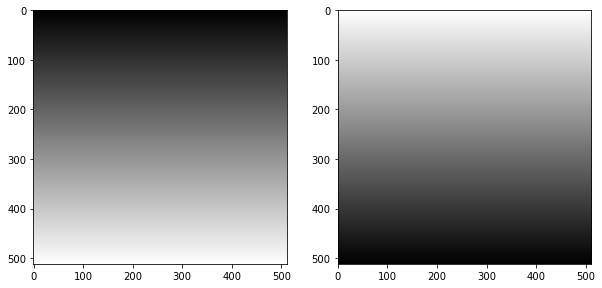

In [4]:
grad_mask = np.repeat(np.linspace(0, 1, 512),512*3).reshape(512,512,3).astype(np.float32) 
grad_mask_2 = np.repeat(np.linspace(1, 0, 512),512*3).reshape(512,512,3).astype(np.float32) 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,5))

ax.flat[0].imshow(grad_mask)
ax.flat[1].imshow(grad_mask_2)

In [5]:
def custom_func(layer_outputs):
    losses = []

    output_channel = layer_outputs[0][30]
    loss_component = torch.nn.MSELoss(reduction='mean')(output_channel, torch.zeros_like(output_channel))
    losses.append(loss_component)

    loss = torch.mean(torch.stack(losses))
    return loss


100%|██████████| 10/10 [00:05<00:00,  1.83it/s]


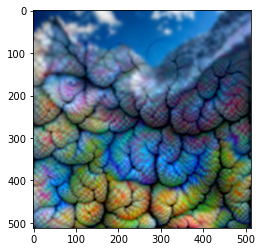

In [6]:
out_single_conv_a = dreamy_boi.deep_dream_with_masks(
    image_path = "sample_small.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 9,
    iterations = 20,
    lr = 0.03,
    max_rotation =  0.3,
    gradient_smoothing_coeff= 1.5,
    gradient_smoothing_kernel_size= 9,
    
    custom_funcs =  [custom_func],
    grad_mask = [grad_mask]
    
)
plt.imshow(out_single_conv_a)

100%|██████████| 10/10 [00:05<00:00,  1.85it/s]


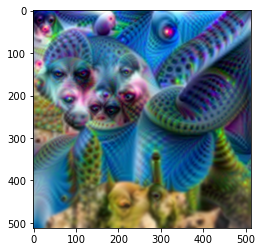

In [7]:
out_single_conv_b = dreamy_boi.deep_dream_with_masks(
    image_path = "sample_small.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 9,
    iterations = 20,
    lr = 0.03,
    max_rotation =  0.3,
    gradient_smoothing_coeff= 1.5,
    gradient_smoothing_kernel_size= 9,
    
    custom_funcs =  [None],
    grad_mask = [grad_mask_2]
    
)
plt.imshow(out_single_conv_b)

In [9]:
out_single_conv = dreamy_boi.deep_dream_with_masks(
    image_path = "sample_small.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 9,
    iterations = 20,
    lr = 0.03,
    max_rotation =  0.3,
    gradient_smoothing_coeff= 1.5,
    gradient_smoothing_kernel_size= 9,
    
    custom_funcs =  [custom_func, None],
    grad_mask = [grad_mask, grad_mask_2]
    
)

100%|██████████| 10/10 [00:10<00:00,  1.06s/it]


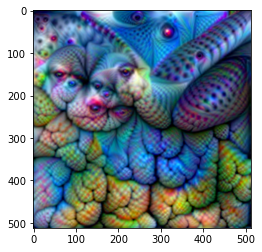

In [10]:
plt.imshow(out_single_conv)

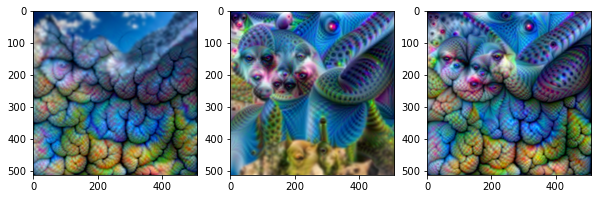

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (10,5))
ax.flat[0].imshow(out_single_conv_a)
ax.flat[1].imshow(out_single_conv_b)
ax.flat[2].imshow(out_single_conv)

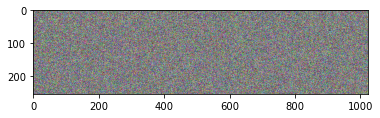

In [40]:
noise_long = (np.random.rand(256,1024,3).astype(np.float32) *255).astype(np.uint8)
cv2.imwrite("noise_long.jpg", noise_long)
plt.imshow(noise_long)

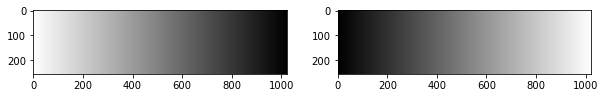

In [83]:
grad_mask =  cv2.rotate(np.repeat(np.linspace(0, 1, 512),512*3).reshape(1024,256,3).astype(np.float32) ,cv2.ROTATE_90_CLOCKWISE)
grad_mask_2 =  cv2.rotate(np.repeat(np.linspace(1, 0, 512),512*3).reshape(1024,256,3).astype(np.float32) ,cv2.ROTATE_90_CLOCKWISE)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,5))

ax.flat[0].imshow(grad_mask)
ax.flat[1].imshow(grad_mask_2)

In [110]:
layers_to_use = [model.Mixed_6c.branch7x7_1.conv, model.Mixed_6d.branch7x7_1.conv]

def custom_func(layer_outputs):
    losses = []

    output_channel = layer_outputs[0][0]
    loss_component = torch.nn.MSELoss(reduction='mean')(output_channel, torch.zeros_like(output_channel))
    losses.append(loss_component)

    loss = torch.mean(torch.stack(losses))
    return loss

def custom_func_2(layer_outputs):
    losses = []

    output_channel = layer_outputs[1][10]
    loss_component = torch.nn.MSELoss(reduction='mean')(output_channel, torch.zeros_like(output_channel))
    losses.append(loss_component)

    loss = torch.mean(torch.stack(losses))
    return loss

out_single_conv = dreamy_boi.deep_dream_with_masks(
    image_path = "noise_long.jpg",
    layers = layers_to_use,
    octave_scale = 1.1,
    num_octaves = 9,
    iterations = 20,
    lr = 0.06,
    max_rotation =  0.3,
    gradient_smoothing_coeff= 1.5,
    gradient_smoothing_kernel_size= 9,
    
    custom_funcs =  [custom_func, custom_func_2],
    grad_mask = [grad_mask, grad_mask_2]
    
)

100%|██████████| 10/10 [00:11<00:00,  1.10s/it]


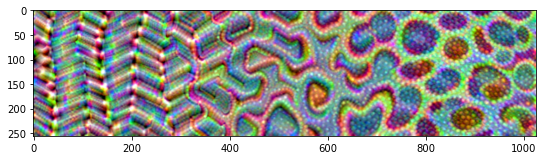

In [111]:
plt.rcParams['figure.figsize'] = 9,9

plt.imshow(out_single_conv)